# Names and the media

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')

Loading CSV:

In [3]:
names = pd.read_csv('names_nationaldata.csv')

Creating a dataframe that show the historical popularity of each name in the database.

In [4]:
# Separating male and female names
namesM = names[names.sex=='M'].reset_index(drop=True)
namesF = names[names.sex=='F'].reset_index(drop=True)
# Pivot to have names in columns and years as index
namesMperYear = namesM.pivot(index='year', columns='name', values='number')
namesMperYear = namesMperYear.replace(to_replace=np.NaN, value=0)
namesFperYear = namesF.pivot(index='year', columns='name', values='number')
namesFperYear = namesFperYear.replace(to_replace=np.NaN, value=0)

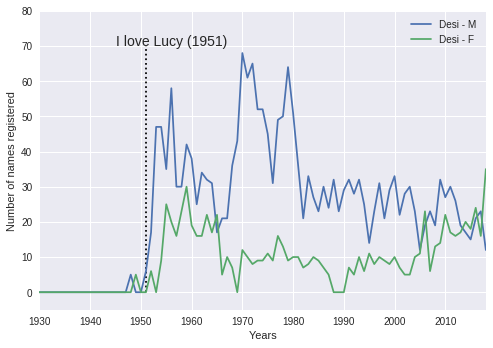

In [5]:
name = 'Desi'
_ = namesMperYear[name].plot(label=name + ' - M')
_ = namesFperYear[name].plot(label=name + ' - F')

_ = plt.vlines(1951, 0, 70, linestyles='dotted')
_ = plt.text(1945, 70, 'I love Lucy (1951)', fontsize=14)
_ = plt.legend()
_ = plt.xlabel('Years')
_ = plt.ylabel('Number of names registered')
_ = plt.xlim(1930, 2018)
_ = plt.ylim(-5, 80)

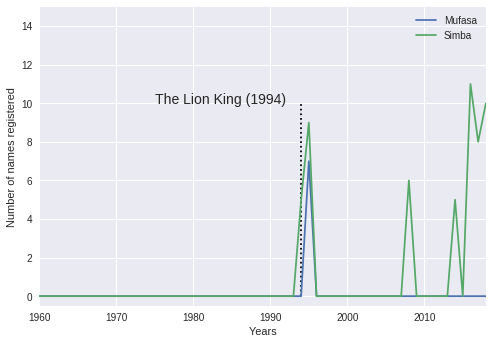

In [6]:
_ = namesMperYear[['Mufasa', 'Simba']].plot()

_ = plt.vlines(1994, 0, 10, linestyles='dotted')
_ = plt.text(1975, 10, 'The Lion King (1994)', fontsize=14)
_ = plt.legend()
_ = plt.xlabel('Years')
_ = plt.ylabel('Number of names registered')
_ = plt.xlim(1960,2018)
_ = plt.ylim(-.5, 15)

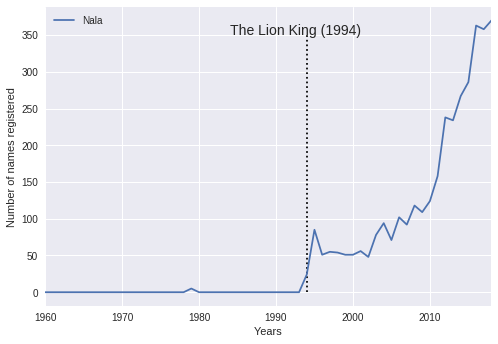

In [7]:
_ = namesFperYear['Nala'].plot()

_ = plt.vlines(1994, 0, 350, linestyles='dotted')
_ = plt.text(1984, 350, 'The Lion King (1994)', fontsize=14)
_ = plt.legend()
_ = plt.xlabel('Years')
_ = plt.ylabel('Number of names registered')
_ = plt.xlim(1960,2018)

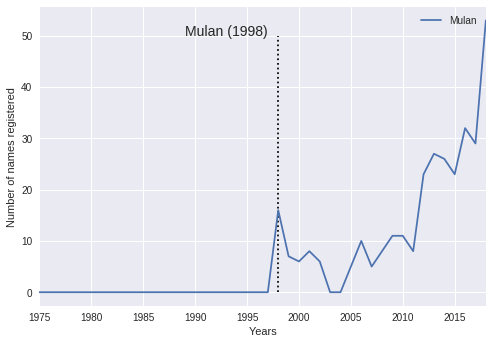

In [12]:
_ = namesFperYear['Mulan'].plot()

_ = plt.vlines(1998, 0, 50, linestyles='dotted')
_ = plt.text(1989, 50, 'Mulan (1998)', fontsize=14)
_ = plt.legend()
_ = plt.xlabel('Years')
_ = plt.ylabel('Number of names registered')
_ = plt.xlim(1975,2018)

In [ ]:
_ = namesFperYear['Arya'].plot()
_ = namesFperYear['Khaleesi'].plot()
_ = namesFperYear['Daenerys'].plot()


_ = plt.vlines(1996, 0, 900, linestyles='dotted')
_ = plt.text(1991, 1000, 'A Game of Thrones (book, 1996)', fontsize=14)
_ = plt.vlines(2011, 0, 2000, linestyles='dotted')
_ = plt.text(2004, 2100, 'Game of Thrones (TV, 2011)', fontsize=14)

_ = plt.legend()
_ = plt.xlabel('Years')
_ = plt.ylabel('Number of names registered')
_ = plt.xlim(1990,2018)

In [ ]:
_ = namesFperYear['Hermione'].plot()

_ = plt.vlines(1997, 0, 30, linestyles='dotted')
_ = plt.text(1955, 32, 'HP&TPS (book, 1997)', fontsize=14)
_ = plt.vlines(2001, 0, 60, linestyles='dotted')
_ = plt.text(1960, 62, 'HP&TPS (film, 2001)', fontsize=14)

_ = plt.legend()
_ = plt.xlabel('Years')
_ = plt.ylabel('Number of names registered')

In [ ]:
_ = namesFperYear['Hermione'].plot()

_ = plt.vlines(1997, 0, 30, linestyles='dotted')
_ = plt.text(1988, 32, 'HP&TPS (book, 1997)', fontsize=14)
_ = plt.vlines(2001, 0, 60, linestyles='dotted')
_ = plt.text(1993, 62, 'HP&TPS (film, 2001)', fontsize=14)

_ = plt.legend()
_ = plt.xlabel('Years')
_ = plt.ylabel('Number of names registered')
_ = plt.xlim(1980,2018)